In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import folium
import pyproj

In [8]:
# Read in the data from excel
fp = 'data/bddat_raw.xlsx'

raw = pd.read_excel(fp)
raw.head(2)
raw.columns

Index(['No.', 'Eruption', 'Tephra Thickness (mm)', 'Tephra Load', 'Final DS',
       'Standardised Asset Type', 'No. of Floors', 'Building Frame',
       'Standardised Building Frame', 'Roof Structure Material',
       'Standardised Roof Structure Material', 'Roof Covering Material',
       'Standardised Roof Covering Material', 'Roof Pitch', 'Roof Span',
       'Observations', 'Latitude', 'Longitude'],
      dtype='object')

In [22]:
# Select desired columns
cols = ['Eruption','Tephra Thickness (mm)', 'Tephra Load', 'Final DS','Standardised Building Frame', 'Standardised Roof Structure Material', 'Observations', 'Latitude', 'Longitude']

df = raw[cols]
df.head()

,Eruption,Tephra Thickness (mm),Tephra Load,Final DS,Standardised Building Frame,Standardised Roof Structure Material,Observations,Latitude,Longitude
0,rabaul,650.0,11036.250,5.00,Wood,Wood,"K54,050 - substantially damaged beyond economi...",-4.200388,152.184254
1,rabaul,555.0,9314.595,5.00,Wood,Wood,"K80,125 - substantially damaged beyond economi...",-4.199991,152.182847
2,rabaul,160.0,2295.540,0.75,Wood,Wood,"No volcano damage, Cleanup only - K2000, SI K5...",-4.199281,152.168085
3,rabaul,160.0,2295.540,0.75,Wood,Wood,"No volcano damage, Clean-up only - K2000, SI K...",-4.199414,152.168097
4,rabaul,110.0,1412.640,1.00,Wood,Wood,"K2000. SI K 89,000 No volcano damage - clean u...",-4.200121,152.160360


In [28]:
# manipulate data

df['load_kpa'] = round(df['Tephra Load']/1000,1)
df['thickness_cm'] = df['Tephra Thickness (mm)']/10

df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Eruption,Tephra Thickness (mm),Tephra Load,Final DS,Standardised Building Frame,Standardised Roof Structure Material,Observations,Latitude,Longitude,load_kpa,thickness_cm
0,rabaul,650.0,11036.250,5.00,Wood,Wood,"K54,050 - substantially damaged beyond economi...",-4.200388,152.184254,11.0,65.0
1,rabaul,555.0,9314.595,5.00,Wood,Wood,"K80,125 - substantially damaged beyond economi...",-4.199991,152.182847,9.3,55.5
2,rabaul,160.0,2295.540,0.75,Wood,Wood,"No volcano damage, Cleanup only - K2000, SI K5...",-4.199281,152.168085,2.3,16.0
3,rabaul,160.0,2295.540,0.75,Wood,Wood,"No volcano damage, Clean-up only - K2000, SI K...",-4.199414,152.168097,2.3,16.0
4,rabaul,110.0,1412.640,1.00,Wood,Wood,"K2000. SI K 89,000 No volcano damage - clean u...",-4.200121,152.160360,1.4,11.0


In [29]:
# Convert the dataframe into a geodataframe with an appropritate CRS
gdf = gpd.GeoDataFrame(df, 
                       geometry = gpd.points_from_xy(df['Longitude'],df['Latitude']),
                      crs = pyproj.CRS("EPSG:4326")) # lat long coords so using wgs84 CRS
print(gdf.crs, ': wgs84')

EPSG:4326 : wgs84


<AxesSubplot:>

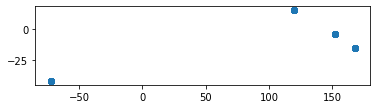

In [11]:
# Make a static plot
gdf.plot()

# Convert it to interactive leaflet 
#mplleaflet.show()


## Add isopach shapefiles

<AxesSubplot:>

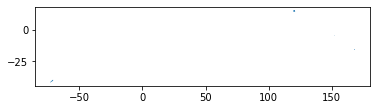

In [40]:
fp = 'data/merged_isos.gpkg'
tephra = gpd.read_file(fp)

tephra.plot()

## Create a map in Folium

In [13]:
# first create a map instance
m = folium.Map(location=[0, 140], zoom_start=3, control_scale=True)
#m

In [14]:
# You can save this map to an html
output_fp = 'damage_map.html'
m.save(output_fp)

In [41]:
# Convert GeoDataFrames to geoJSON to add them to the basemap
data_gjson = folium.features.GeoJson(gdf, name='building damage')
tephra_gjson = folium.features.GeoJson(tephra, name = 'isopachs')

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [18]:
# Check the GeoJSON features - prints ALL rows of the dataset
#data_gjson.data.get('features')

# Add points to the previously empty map

In [49]:
# Create the map instance 
m = folium.Map(location=[0,15], zoom_start=2, control_scale=True)

# Add the data to the map
data_gjson.add_to(m)
#tephra_gjson.add_to(m)

folium.LayerControl().add_to(m)
m

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# Turn the points into a points cluster

In [32]:
from folium.plugins import MarkerCluster

In [30]:
size = len(gdf)
lons = gdf["geometry"].apply(lambda geom: geom.x)
lats = gdf["geometry"].apply(lambda geom: geom.y)

locations = list(zip(lats, lons))
thickness = gdf['thickness_cm']
obs = gdf['Observations']
frame = gdf['Standardised Building Frame']
roof = gdf['Standardised Roof Structure Material']

In [70]:
# Create the map instance 
m = folium.Map(location=[-4,152], zoom_start=7, control_scale=True)#tiles='stamenterrain'

marker_cluster = MarkerCluster(
    name= 'Damaged building clusters',
    overlay=True,
    control=True,
    icon_create_function=None
)

for k in range(size):
    location = lats[k], lons[k]
    marker = folium.Marker(location=location)
    popup = 'Observations:{}<br>Building frame:{}<br>Roof frame:{}'.format(obs[k],frame[k], roof[k])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
    
marker_cluster.add_to(m)

folium.GeoJson(
    tephra,
    style_function = lambda x: {
        'color': 'black',
        'weight': 2.5,
        'fillOpacity': 0
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['thick_cm'],
        aliases=['Thickness cm:'],
        localize=False
    ),
    name='tephra').add_to(m)

folium.LayerControl().add_to(m)
m

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [69]:
# You can save this map to an html
output_fp = 'tephra_building_damage.html'
m.save(output_fp)